In [14]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [16]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3063,ham,Ok. How many should i buy.,NaN,NaN,NaN
3996,spam,Bored housewives! Chat n date now! 0871750.77....,NaN,NaN,NaN
241,ham,PLEASSSSSSSEEEEEE TEL ME V AVENT DONE SPORTSx,NaN,NaN,NaN
1669,ham,Very hurting n meaningful lines ever: \I compr...,But at d end my love compromised me for every...,NaN,NaN
3168,ham,"Haven't seen my facebook, huh? Lol!",NaN,NaN,NaN


In [17]:
df.shape


(5577, 5)

In [281]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1 . Data Cleaning

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5577 entries, 0 to 5576
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5577 non-null   object
 1   v2          5577 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 218.0+ KB


In [19]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [20]:
df.sample(5)

,v1,v2
1439,ham,In fact when do you leave? I think addie goes ...
1840,ham,Yeah. I got a list with only u and Joanna if I...
2818,ham,Don't forget who owns you and who's private pr...
1269,ham,"Tee hee. Off to lecture, cheery bye bye."
5062,ham,Ok i also wan 2 watch e 9 pm show...


In [21]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4240,ham,Detroit. The home of snow. Enjoy it.
4877,spam,No 1 POLYPHONIC tone 4 ur mob every week! Just...
2783,ham,"Just arrived, see you in a couple days &lt;3"
909,spam,"January Male Sale! Hot Gay chat now cheaper, c..."
610,spam,22 days to kick off! For Euro2004 U will be ke...


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
df['target'] = encoder.fit_transform(df['target'])

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [26]:
# check for duplicate values
df.duplicated().sum()

403

In [27]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [28]:
df.duplicated().sum()

0

In [29]:
df.shape

(5174, 2)

# 2 .EDA

In [30]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df['target'].value_counts()

0    4516
1     658
Name: target, dtype: int64

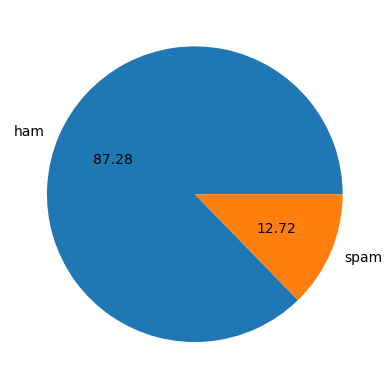

In [32]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [27]:
# Data is imbalanced

In [33]:
import nltk

In [34]:
!pip install nltk

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tayya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
df['num_characters'] = df['text'].apply(len)

In [37]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [39]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [40]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5174.000000,5174.000000,5174.000000
mean,78.984152,18.453807,1.947429
std,58.209419,13.318551,1.361827
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.500000,15.000000,1.000000
75%,116.750000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [43]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [44]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,658.000000,658.000000,658.000000
mean,137.492401,27.601824,2.962006
std,30.381553,7.025034,1.479464
min,13.000000,2.000000,1.000000
25%,131.250000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [45]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

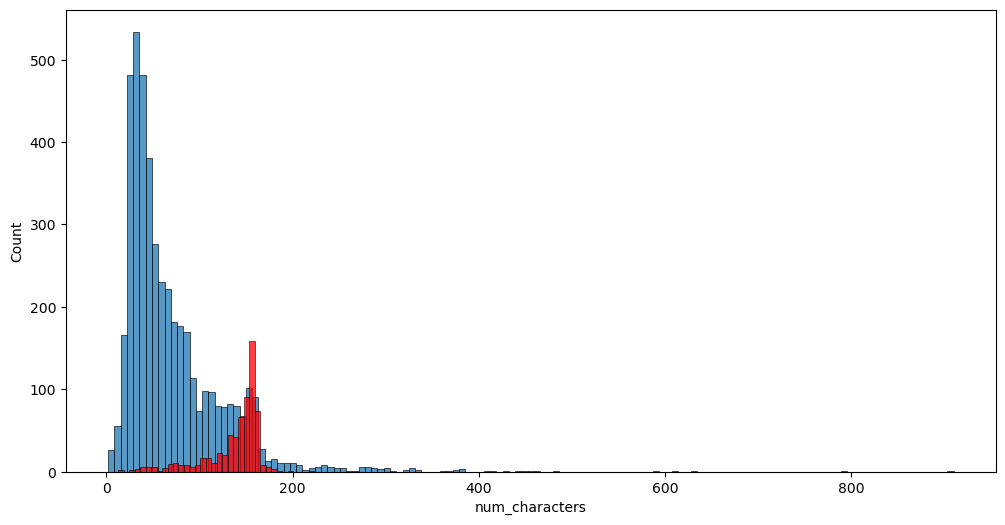

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

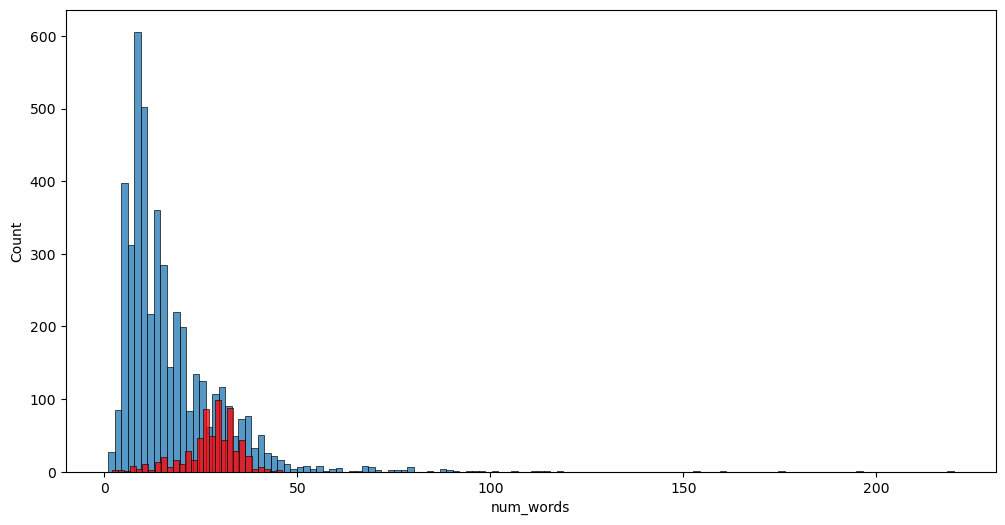

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

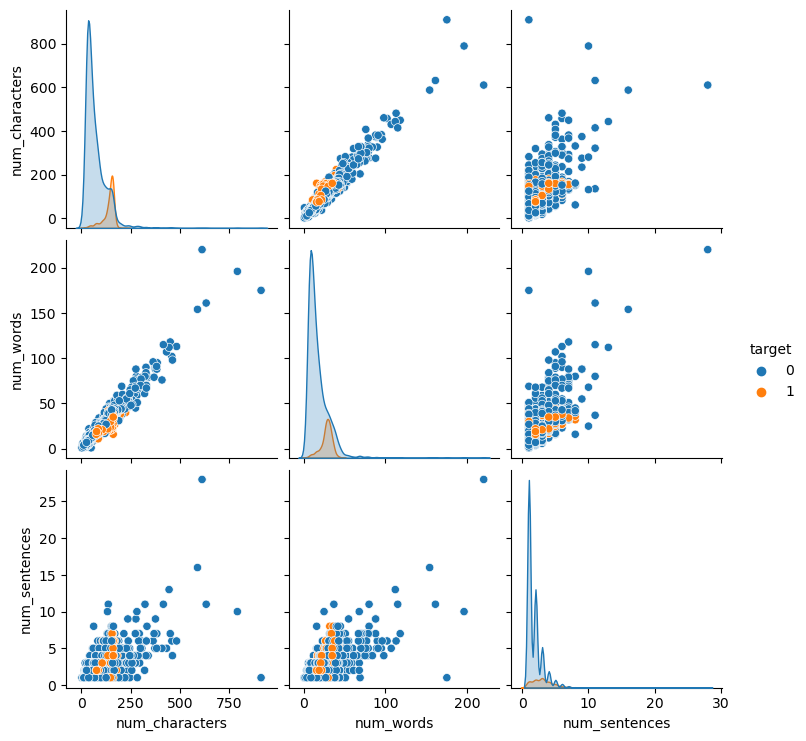

In [48]:
sns.pairplot(df,hue='target')

C:\Users\tayya\AppData\Local\Temp\ipykernel_25768\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

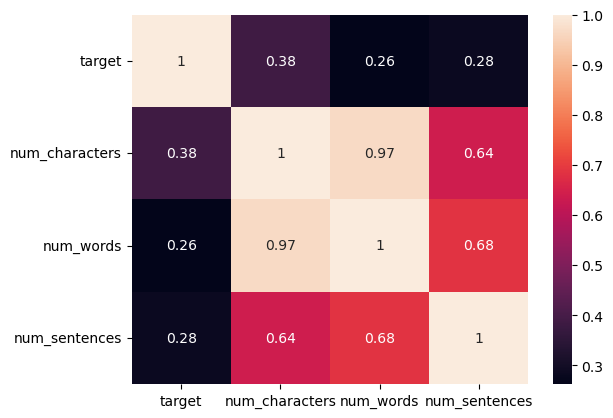

In [49]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing
Lower case ,
Tokenization,
Removing special characters,
Removing stop words and punctuation,
Stemming


In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download necessary NLTK data files (only needed once)
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the stemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tayya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tayya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [57]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [59]:
df['transformed_text'] = df['text'].apply(transform_text)

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [65]:
!pip install wordcloud

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [66]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

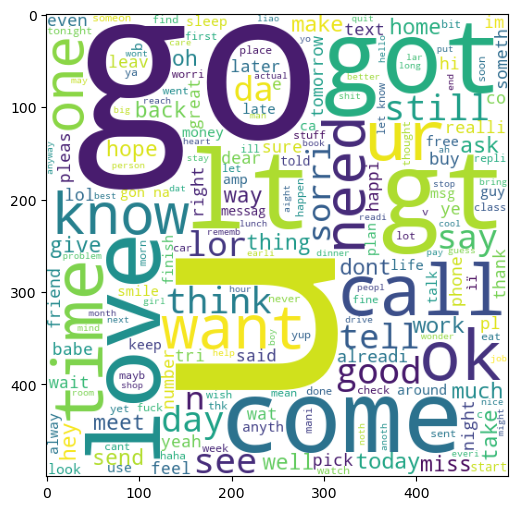

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [67]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

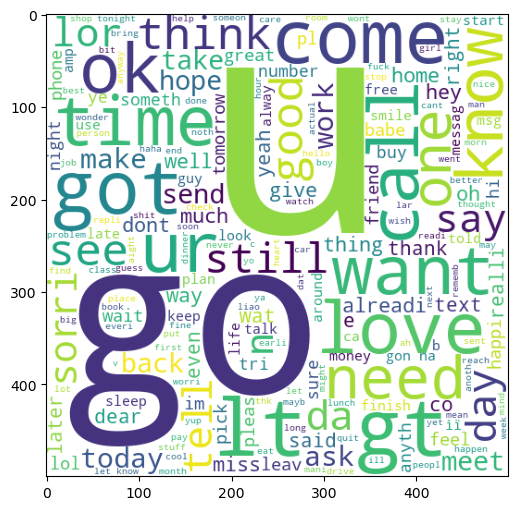

In [68]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [70]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [71]:
len(spam_corpus)

9988

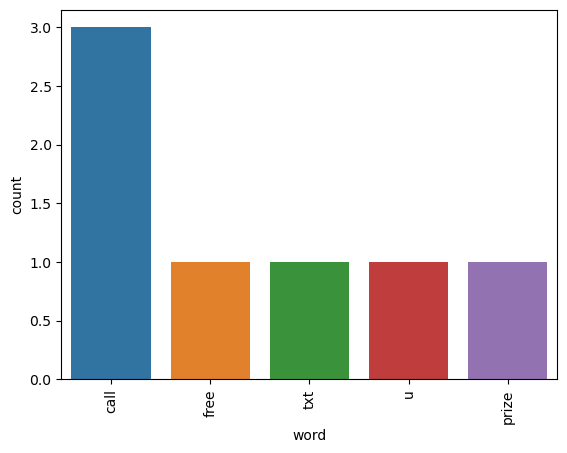

In [72]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is a list of words (replace this with your actual data)
spam_corpus = ['call', 'free', 'call', 'txt', 'u', 'call', 'prize']

# Get the 30 most common words
most_common_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Create the bar plot
sns.barplot(x=df_most_common['word'], y=df_most_common['count'])
plt.xticks(rotation='vertical')
plt.show()


In [73]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [74]:
len(ham_corpus)

35394

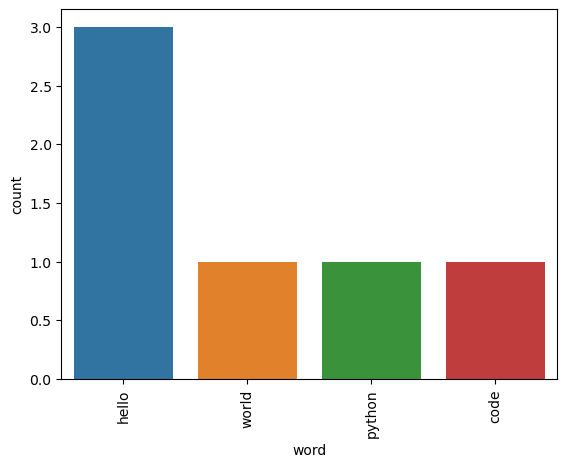

In [75]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ham_corpus is a list of words (replace this with your actual data)
ham_corpus = ['hello', 'world', 'hello', 'python', 'hello', 'code']

# Get the 30 most common words
most_common_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Create the bar plot
sns.barplot(x=df_most_common['word'], y=df_most_common['count'])
plt.xticks(rotation='vertical')
plt.show()


In [76]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Modeling Building

In [77]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [78]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [320]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [302]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [79]:
X.shape

(5174, 3000)

In [81]:
y = df['target'].values

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [84]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [85]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [86]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8463768115942029
[[766 136]
 [ 23 110]]
0.44715447154471544


In [87]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9768115942028985
[[901   1]
 [ 23 110]]
0.990990990990991


In [329]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [142]:
# tfidf --> MNB

In [88]:
!pip install xgboost --default-timeout=1000


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Now you can use the classifiers


In [91]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [92]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}

In [93]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [94]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9739130434782609, 0.9649122807017544)

In [99]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9739130434782609
Precision -  0.9649122807017544
For  KN
Accuracy -  0.9130434782608695
Precision -  0.9777777777777777
For  NB
Accuracy -  0.9768115942028985
Precision -  0.990990990990991
For  DT
Accuracy -  0.9420289855072463
Precision -  0.8230088495575221
For  LR
Accuracy -  0.9594202898550724
Precision -  0.941747572815534
For  RF
Accuracy -  0.9797101449275363
Precision -  1.0
For  AdaBoost
Accuracy -  0.9652173913043478
Precision -  0.9532710280373832
For  BgC
Accuracy -  0.9623188405797102
Precision -  0.8507462686567164
For  ETC
Accuracy -  0.9768115942028985
Precision -  0.9739130434782609
For  GBDT
Accuracy -  0.9526570048309179
Precision -  0.92


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [134]:
performance_df


,Algorithm,Accuracy,Precision
5,RF,0.979710,1.000000
2,NB,0.976812,0.990991
1,KN,0.913043,0.977778
8,ETC,0.976812,0.973913
0,SVC,0.973913,0.964912
6,AdaBoost,0.965217,0.953271
4,LR,0.959420,0.941748
9,GBDT,0.952657,0.920000
7,BgC,0.962319,0.850746
3,DT,0.942029,0.823009


In [135]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [136]:
performance_df1


,Algorithm,variable,value
0,RF,Accuracy,0.979710
1,NB,Accuracy,0.976812
2,KN,Accuracy,0.913043
3,ETC,Accuracy,0.976812
4,SVC,Accuracy,0.973913
5,AdaBoost,Accuracy,0.965217
6,LR,Accuracy,0.959420
7,GBDT,Accuracy,0.952657
8,BgC,Accuracy,0.962319
9,DT,Accuracy,0.942029


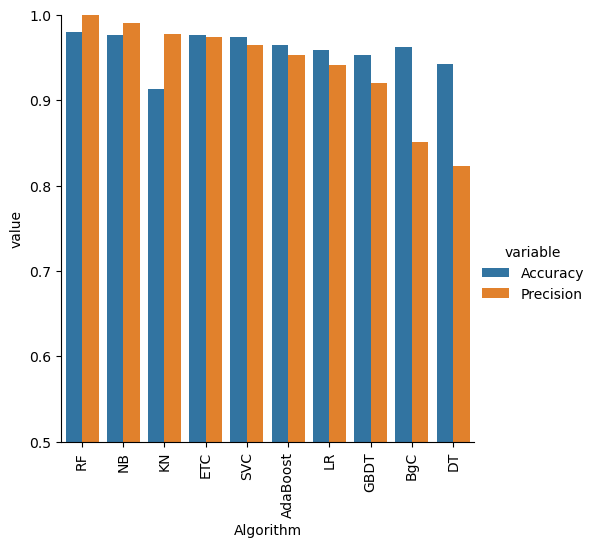

In [137]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [239]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [138]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [139]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [140]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [141]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [117]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [142]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_scaling,Precision_scaling
0,RF,0.979710,1.000000,0.979710,1.000000,0.979710,1.000000,0.979710,1.000000
1,NB,0.976812,0.990991,0.976812,0.990991,0.976812,0.990991,0.976812,0.990991
2,KN,0.913043,0.977778,0.913043,0.977778,0.913043,0.977778,0.913043,0.977778
3,ETC,0.976812,0.973913,0.976812,0.973913,0.976812,0.973913,0.976812,0.973913
4,SVC,0.973913,0.964912,0.973913,0.964912,0.973913,0.964912,0.973913,0.964912
5,AdaBoost,0.965217,0.953271,0.965217,0.953271,0.965217,0.953271,0.965217,0.953271
6,LR,0.959420,0.941748,0.959420,0.941748,0.959420,0.941748,0.959420,0.941748
7,GBDT,0.952657,0.920000,0.952657,0.920000,0.952657,0.920000,0.952657,0.920000
8,BgC,0.962319,0.850746,0.962319,0.850746,0.962319,0.850746,0.962319,0.850746
9,DT,0.942029,0.823009,0.942029,0.823009,0.942029,0.823009,0.942029,0.823009


In [143]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [144]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [145]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [146]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816425120772947
Precision 0.9913793103448276


In [147]:
 mnb.fit(X_train,y_train)



MultinomialNB()

In [148]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [149]:
from sklearn.ensemble import StackingClassifier

In [150]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [337]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697
     --------------------------------------- 99.8/99.8 MB 39.5 kB/s eta 0:00:00
     -------------------------------------- 99.8/99.8 MB 182.1 kB/s eta 0:00:00


In [153]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [154]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load your data and preprocessing steps here...

# Train the model (this should be part of your training script)
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

mnb = MultinomialNB()
mnb.fit(X, y)

# Save the vectorizer and model
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
with open('model.pkl', 'wb') as f:
    pickle.dump(mnb, f)


In [10]:
import sklearn
print(sklearn.__version__)



1.2.1


In [155]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

# Load your dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']

# Preprocess the data
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split the data
X = df['message']
y = df['label']

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(X).toarray()

# Train the model
model = MultinomialNB()
model.fit(X, y)

# Save the model and vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [156]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [157]:
import joblib

# Save the model and vectorizer
joblib.dump(tfidf, 'vectorizer.joblib')
joblib.dump(model, 'model.joblib')


['model.joblib']

In [159]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import joblib

# Ensure nltk stopwords are downloaded
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']

# Preprocess the data
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d', ' ', text)
    text = text.strip()
    return text

df['message'] = df['message'].apply(preprocess_text)

# Tokenize, remove stopwords, and apply stemming
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def process_text(text):
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['message'] = df['message'].apply(process_text)

# Split the data
X = df['message']
y = df['label']

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(X).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

# Save the model and vectorizer
joblib.dump(tfidf, 'vectorizer.joblib')
print("Vectorizer saved successfully.")
joblib.dump(model, 'model.joblib')
print("Model saved successfully.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tayya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.974910394265233
Precision: 0.9847328244274809
Vectorizer saved successfully.
Model saved successfully.
